In [2]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [3]:
import csv
import numpy as np
import math
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import random
from datetime import datetime as dt

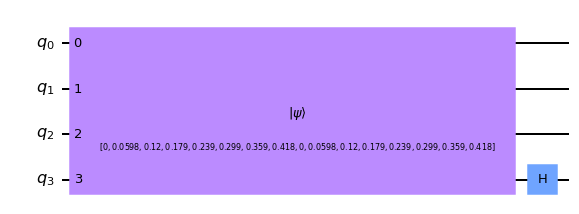

In [4]:
x = np.arange(0,8,1)
y = x

N = len(x)
nqubits = math.ceil(np.log2(N))
xnorm = np.linalg.norm(x)
ynorm = np.linalg.norm(y)
x = x/xnorm
y = y/ynorm

circ = QuantumCircuit(nqubits+1)
vec = np.concatenate((x,y))/np.sqrt(2)

circ.initialize(vec, range(nqubits+1))
circ.h(nqubits)

circ.draw()

In [5]:
#Calculates the inner product between two vectors

def inner_prod(vec1, vec2):
    #first check lengths are equal
    if len(vec1) != len(vec2):
        raise ValueError('Lengths of states are not equal')
        
    circ = QuantumCircuit(nqubits+1)
    vec = np.concatenate((vec1,vec2))/np.sqrt(2)
    
    circ.initialize(vec, range(nqubits+1))
    circ.h(nqubits)

    backend = Aer.get_backend('statevector_simulator')
    job = execute(circ, backend, backend_options = {"zero_threshold": 1e-20})

    result = job.result()
    o = np.real(result.get_statevector(circ))

    m_sum = 0
    for l in range(N):
        m_sum += o[l]**2
        
    return 2*m_sum-1

x = np.arange(0,8,1)
y = x

N = len(x)
nqubits = math.ceil(np.log2(N))
xnorm = np.linalg.norm(x)
ynorm = np.linalg.norm(y)
x = x/xnorm
y = y/ynorm

print("x: ", x)
print()
print("y: ", y)
print()
print("The inner product of x and y equals: ", inner_prod(x,y))

x:  [0.         0.08451543 0.16903085 0.25354628 0.3380617  0.42257713
 0.50709255 0.59160798]

y:  [0.         0.08451543 0.16903085 0.25354628 0.3380617  0.42257713
 0.50709255 0.59160798]

The inner product of x and y equals:  0.9999999999999998


<ipython-input-5-acf471cf0c20>:15: DeprecationWarning: Using `backend_options` kwarg has been deprecated as of qiskit-aer 0.7.0 and will be removed no earlier than 3 months from that release date. Runtime backend options should now be added directly using kwargs for each option.
  job = execute(circ, backend, backend_options = {"zero_threshold": 1e-20})


In [9]:
#Implements the entire cost function on the quantum circuit

def calculate_cost_function(parameters):

    #a, b = parameters
    a=parameters[1]
    b=parameters[0]
    
    #phiphi = (xnorm/ynorm*a)**2.0 + 2.0*a*b*xnorm*np.sqrt(N)/ynorm**2*inner_prod(x,ones) + b**2*N/ynorm**2
    
    yphi = a*xnorm/ynorm*inner_prod(y,x) + b*np.sqrt(N)/ynorm*inner_prod(y,ones)
    
    #print("phiphi: ", phiphi)
    #print("yphi: ", yphi)

    #print(abs(1-float(yphi**2/phiphi)))
    #return (1-float(yphi**2/phiphi))**2
    
    return (1-yphi)**2

ones = np.ones(N)/np.sqrt(N)
a = 1.0
b = 1.0
print("Cost function for a =", a, "and b =", b, "equals:", calculate_cost_function([a,b]))

Traceback (most recent call last):
  File "<ipython-input-9-25827d3c492f>", line 24, in <module>
    print("Cost function for a =", a, "and b =", b, "equals:", calculate_cost_function([a,b]))
  File "<ipython-input-9-25827d3c492f>", line 11, in calculate_cost_function
    yphi = a*xnorm/ynorm*inner_prod(y,x) + b*np.sqrt(N)/ynorm*inner_prod(y,ones)
  File "<ipython-input-5-acf471cf0c20>", line 11, in inner_prod
    circ.initialize(vec, range(nqubits+1))
  File "/opt/conda/lib/python3.8/site-packages/qiskit/extensions/quantum_initializer/initializer.py", line 274, in initialize
    return self.append(Initialize(params), qubits)
  File "/opt/conda/lib/python3.8/site-packages/qiskit/extensions/quantum_initializer/initializer.py", line 57, in __init__
    raise QiskitError("Sum of amplitudes-squared does not equal one.")
QiskitError: 'Sum of amplitudes-squared does not equal one.'

Use %tb to get the full traceback.


In [1]:
#first set up the data sets x and y

x = np.arange(0,8,1)
y = x #+ [random.uniform(-1,1) for p in range(8)]
z=x
N = len(x)
nqubits = math.ceil(np.log2(N))

ones = np.ones(N)/np.sqrt(N)    #need a normalised ones' state for including the parameter b

xnorm = np.linalg.norm(x)       #normalise data sets
ynorm = np.linalg.norm(y)
znorm = np.linalg.norm(z)
x = x/xnorm
y = y/ynorm
z = z/znorm

#x0 = [random.uniform(0,2) for p in range(2)]    #random initial guess for a and b
x0 = [0.5,0.5,0.5]

#now use different classical optimisers to see which one works best

out = minimize(calculate_cost_function, x0=x0, method="BFGS", options={'maxiter':200}, tol=1e-6)
out1 = minimize(calculate_cost_function, x0=x0, method="COBYLA", options={'maxiter':200}, tol=1e-6)
out2 = minimize(calculate_cost_function, x0=x0, method="Nelder-Mead", options={'maxiter':200}, tol=1e-6)
out3 = minimize(calculate_cost_function, x0=x0, method="CG", options={'maxiter':200}, tol=1e-6)
out4 = minimize(calculate_cost_function, x0=x0, method="trust-constr", options={'maxiter':200}, tol=1e-6)

out_a1 = out1['x'][0]
out_b1 = out1['x'][1]

#print("COBYLA: ", out1)

out_a = out['x'][0]
out_b = out['x'][1]

#print("BFGS: ", out)

out_a2 = out2['x'][0]
out_b2 = out2['x'][1]

#print("Nelder-Mead: ", out2)

out_a3 = out3['x'][0]
out_b3 = out3['x'][1]

#print("CG: ", out3)

out_a4 = out4['x'][0]
out_b4 = out4['x'][1]

#print("trust-constr: ", out4)

plt.scatter(x*xnorm,y*ynorm,z*znorm)
xfit = np.linspace(min(x)*xnorm, max(x)*xnorm, 100)
#plt.plot(xfit, preout['x'][0]*xfit+preout['x'][1], label='Basinhopping')
plt.plot(xfit, out_a*xfit+out_b, label='BFGS')
plt.plot(xfit, out_a1*xfit+out_b1, label='COBYLA')
plt.plot(xfit, out_a2*xfit+out_b2, label='Nelder-Mead')
plt.plot(xfit, out_a3*xfit+out_b3, label='CG')
plt.plot(xfit, out_a4*xfit+out_b4, label='trust-constr')
plt.legend()
plt.title("y = x")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Traceback (most recent call last):
  File "<ipython-input-1-e3badf98d93a>", line 3, in <module>
    x = np.arange(0,8,1)
NameError: name 'np' is not defined

Use %tb to get the full traceback.


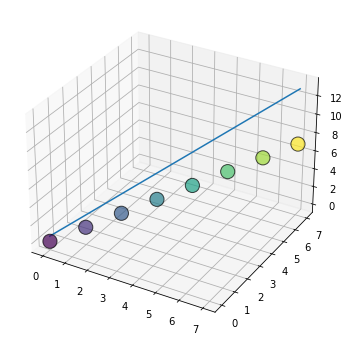

In [14]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x*xnorm,y*ynorm,z*znorm,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.plot(xfit, xfit, 2*out_a*xfit+out_b, label='BFGS')
plt.show()

In [71]:
def calculate_cost_function_n(parameters):

    yphi = parameters[0]*np.sqrt(N)/ynorm*inner_prod(y,ones)

    for i in range(1,len(parameters)):
        if(i==len(parameters)-1):
            xpow = z
        else:
            xpow = x**i
        xnormpow = np.linalg.norm(xpow)
        xpow = xpow/xnormpow
        
        yphi += parameters[i]*xnormpow/ynorm*inner_prod(y,xpow)
    
    #print((1-yphi)**2)
    return (1-yphi)**2

In [87]:
with open('covid-test-vaccination-by-zip-inner-join.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        print(', '.join(row))

ZIP, Code,Week, Number,Week, Start,Week, End,Cases, -, Weekly,Cases, -, Cumulative,Case, Rate, -, Weekly,Case, Rate, -, Cumulative,Tests, -, Weekly,Tests, -, Cumulative,Test, Rate, -, Weekly,Test, Rate, -, Cumulative,Percent, Tested, Positive, -, Weekly,Percent, Tested, Positive, -, Cumulative,Deaths, -, Weekly,Deaths, -, Cumulative,Death, Rate, -, Weekly,Death, Rate, -, Cumulative,Population,Row, ID,ZIP, Code, Location,Total, Doses, -, weekly,Total, Doses, -, Cumulative,1st, Dose, -, weekly,1st, Dose, -, Cumulative,1st, Dose, -, Percent, Population,Vaccine, Series, Completed, -, weekly,Vaccine, Series, Completed, -, Cumulative,Vaccine, Series, Completed, , -, Percent
60603,51,12/13/2020,12/19/2020,1,42,85,3577.5,81,1021,6900,86967.6,0.0,0.0,0,0,0.0,0.0,1174,60603-2020-51,POINT, (-87.625473, 41.880112),0,0,0,0,0.0,0,0,0.0
60603,52,12/20/2020,12/26/2020,5,47,426,4003.4,48,1069,4089,91056.2,0.1,0.0,0,0,0.0,0.0,1174,60603-2020-52,POINT, (-87.625473, 41.880112),45,269,45,269,0.007,0,0,0.0


In [118]:
#f1 = open('COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code.csv', 'r')
f1 = open('covid-test-vaccination-by-zip-inner-join.csv', 'r')

c1 = csv.reader(f1)
a = dt.strptime("01/01/2020", "%m/%d/%Y")

cumulative_list=[]
cases_list=[]
vaccination_list=[]
row=0
flag=False
for cases_row in c1:
    if(flag==False):
        flag=True
        continue
    if int(cases_row[18])>1000 :
        if(row>127):
            break
        b = dt.strptime(cases_row[2], "%m/%d/%Y")
        if(b>a):
            print(cases_row[6], cases_row[7],cases_row[28])
            cumulative_list.append(float(cases_row[7]))
            cases_list.append(float(cases_row[6]))
            vaccination_list.append(float(cases_row[28]))
            row=row+1

85 3577.5 0.0
426 4003.4 0.0
170 4173.8 0.0
170 4344.1 0.0
596 4940.4 0.0
85 5025.6 0.026
85 5110.7 0.002
170 5281.1 0.005
0 5451.4 0.001
170 5451.4 0.041
68 7600.3 0.001
324 6860.2 0.0
247 7106.9 0.0
182 7289.4 0.026
74 7465.1 0.005
68 7532.7 0.041
254 6535.8 0.0
206 6093.1 0.0
189 6282.3 0.0
101 7390.8 0.002
184 6607 0.0
154 6953 0.002
108 7158.1 0.041
82 7240.1 0.001
200 5697.2 0.0
97 7050.4 0.005
200 6094.5 0.0
197 5894.6 0.0
192 6799.3 0.026
328 6422.5 0.0
144 5814.9 0.0
134 6098.2 0.002
126 6223.9 0.005
52 6275.8 0.041
198 4972.8 0.0
200 5172.3 0.0
218 5389.8 0.0
281 5671.2 0.0
150 5964.5 0.026
48 6323.7 0.001
186 5547.8 0.0
324 5871.7 0.0
188 6059.6 0.0
108 6303.6 0.002
105 6408.8 0.005
90 6498.6 0.041
83 6581.3 0.001
192 5191.6 0.0
170 5361.2 0.0
136 6195.7 0.026
66 8319.3 0.001
85 8253 0.041
269 6497.1 0.0
239 6735.7 0.0
354 7090 0.0
364 7453.6 0.0
163 7872.3 0.026
157 8029.5 0.002
138 8167.7 0.005
256 7709.4 0.0
69 7691.5 0.001
92 7622.1 0.041
242 6952 0.0
177 7128.7 0.0
153 

<ipython-input-5-acf471cf0c20>:15: DeprecationWarning: Using `backend_options` kwarg has been deprecated as of qiskit-aer 0.7.0 and will be removed no earlier than 3 months from that release date. Runtime backend options should now be added directly using kwargs for each option.
  job = execute(circ, backend, backend_options = {"zero_threshold": 1e-20})
<ipython-input-5-acf471cf0c20>:15: DeprecationWarning: Using `backend_options` kwarg has been deprecated as of qiskit-aer 0.7.0 and will be removed no earlier than 3 months from that release date. Runtime backend options should now be added directly using kwargs for each option.
  job = execute(circ, backend, backend_options = {"zero_threshold": 1e-20})
<ipython-input-5-acf471cf0c20>:15: DeprecationWarning: Using `backend_options` kwarg has been deprecated as of qiskit-aer 0.7.0 and will be removed no earlier than 3 months from that release date. Runtime backend options should now be added directly using kwargs for each option.
  job = 

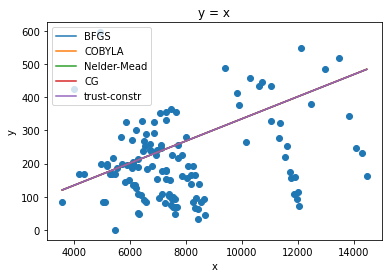

In [119]:

#x = np.arange(0,8,1)
#y = (2*x-1)**3 + [random.uniform(-1,1) for p in range(8)]
x = np.array(cumulative_list)
y = np.array(cases_list)
z=np.array(vaccination_list)
N = len(x)
nqubits = math.ceil(np.log2(N))

ones = np.ones(N)/np.sqrt(N)    #need a normalised ones' state for including the parameter b
       
ynorm = np.linalg.norm(y)       #normalise y data set
y = y/ynorm

order = 2

x0 = [random.uniform(0,2) for p in range(order+1)]    #random initial guess for a and b
#x0 = [1,1]

#now use different classical optimisers to see which one works best

out = minimize(calculate_cost_function_n, x0=x0, method="BFGS", options={'maxiter':200}, tol=1e-6)
out1 = minimize(calculate_cost_function_n, x0=x0, method="COBYLA", options={'maxiter':200}, tol=1e-6)
out2 = minimize(calculate_cost_function_n, x0=x0, method="Nelder-Mead", options={'maxiter':200}, tol=1e-6)
out3 = minimize(calculate_cost_function_n, x0=x0, method="CG", options={'maxiter':200}, tol=1e-6)
out4 = minimize(calculate_cost_function_n, x0=x0, method="trust-constr", options={'maxiter':200}, tol=1e-6)

class_fit = np.polyfit(x,y*ynorm,order)
class_fit = class_fit[::-1]

xfit = np.linspace(min(x), max(x), 100)
zfit = np.linspace(min(z), max(z), 100)

def return_fits(xfit):
    c_fit = np.zeros(100)
    q_fit = np.zeros(100)
    q_fit1 = np.zeros(100)
    q_fit2 = np.zeros(100)
    q_fit3 = np.zeros(100)
    q_fit4 = np.zeros(100)
    for i in range(order):
        c_fit += xfit**i*class_fit[i]
        q_fit += xfit**i*out['x'][i]
        q_fit1 += xfit**i*out1['x'][i]
        q_fit2 += xfit**i*out2['x'][i]
        q_fit3 += xfit**i*out3['x'][i]
        q_fit4 += xfit**i*out4['x'][i]
    c_fit += zfit*class_fit[order]
    q_fit += zfit*out['x'][order]
    q_fit1 += zfit*out1['x'][order]
    q_fit2 += zfit*out2['x'][order]
    q_fit3 += zfit*out3['x'][order]
    q_fit4 += zfit*out4['x'][order]
        

    return c_fit, q_fit, q_fit1, q_fit2, q_fit3, q_fit4

c_fit, q_fit, q_fit1, q_fit2, q_fit3, q_fit4 = return_fits(xfit)

plt.scatter(x,y*ynorm)

plt.plot(xfit, q_fit, label='BFGS')
plt.plot(xfit, q_fit1, label='COBYLA')
plt.plot(xfit, q_fit2, label='Nelder-Mead')
plt.plot(xfit, q_fit3, label='CG')
plt.plot(xfit, q_fit4, label='trust-constr')
plt.legend()
plt.title("y = x")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [120]:
print(z)

[0.    0.    0.    0.    0.    0.026 0.002 0.005 0.001 0.041 0.001 0.
 0.    0.026 0.005 0.041 0.    0.    0.    0.002 0.    0.002 0.041 0.001
 0.    0.005 0.    0.    0.026 0.    0.    0.002 0.005 0.041 0.    0.
 0.    0.    0.026 0.001 0.    0.    0.    0.002 0.005 0.041 0.001 0.
 0.    0.026 0.001 0.041 0.    0.    0.    0.    0.026 0.002 0.005 0.
 0.001 0.041 0.    0.    0.026 0.    0.    0.    0.002 0.005 0.001 0.
 0.    0.026 0.002 0.005 0.041 0.    0.    0.    0.005 0.041 0.    0.026
 0.002 0.    0.    0.    0.    0.001 0.001 0.    0.    0.    0.    0.
 0.026 0.002 0.005 0.041 0.001 0.    0.    0.    0.    0.    0.026 0.002
 0.005 0.041 0.005 0.    0.026 0.    0.001 0.002 0.041 0.    0.    0.
 0.    0.    0.026 0.002 0.005 0.    0.    0.   ]


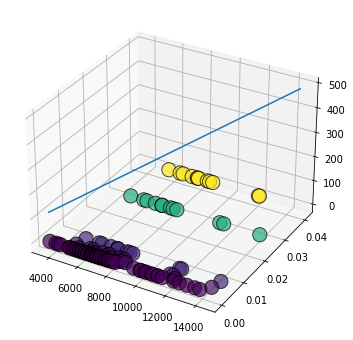

In [121]:

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, z, y,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.plot(xfit, zfit, q_fit, label='BFGS')
plt.show()

In [117]:
print("y=ax+cz+b")
print("b:"+str(out['x'][0]))
print("a:"+str(out['x'][1]))
print("c:"+str(out['x'][2]))

y=ax+cz+b
b:0.6441408030200121
a:0.0373111670817966
c:0.21911180915770592
